# Part 1) Analyse Visitors to a Website

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
# display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

headers = ['date', 'visitors']
# skip 4 rows because pandas assumes the 5th line is the header
data = pd.read_csv('visitors.csv', skiprows=4, names=headers)
data.head()

,date,visitors
0,2015-02-09,59
1,2015-02-08,79
2,2015-02-07,73
3,2015-02-06,89
4,2015-02-05,80


In [8]:
headers = ['date', 'visitors_new']
data_new = pd.read_csv('visitors-new.csv', skiprows=4, names=headers)
data_new.head()

,date,visitors_new
0,2015-02-09,55
1,2015-02-08,64
2,2015-02-07,61
3,2015-02-06,79
4,2015-02-05,60


In [9]:
data_combined = pd.merge(data, data_new)
data_combined.head()

,date,visitors,visitors_new
0,2015-02-09,59,55
1,2015-02-08,79,64
2,2015-02-07,73,61
3,2015-02-06,89,79
4,2015-02-05,80,60


In [10]:
data_combined.sort_values(['date'], inplace=True)
data_combined.set_index('date', inplace=True)
data_combined.head()

,visitors,visitors_new
date,,
2014-07-14,5,4
2014-07-15,58,55
2014-07-16,18,15
2014-07-17,14,10
2014-07-18,11,9


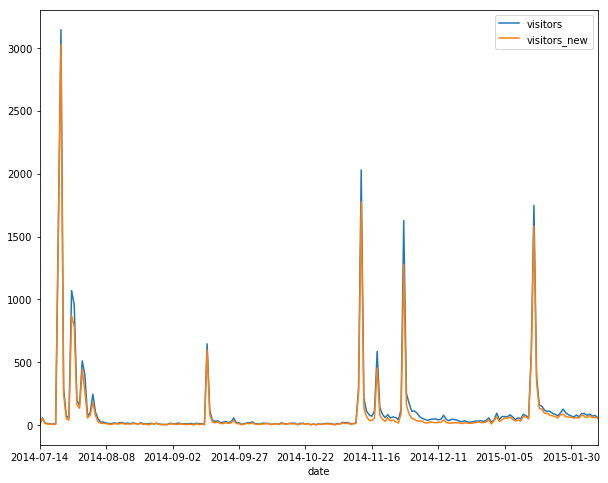

In [11]:
data_combined.plot()
plt.show()

# Part 2) Dealing with Corrupt Data

In [13]:
# read the file
data = pd.read_csv('operating-systems.csv')
data.head()

,Item,Value,Value Percent,Conversions,Conversion Percent,URL,Stats URL
0,Windows 7,3290,26.2,NaN,NaN,NaN,http://clicky.com/stats/visitors?site_id=10075...
1,Mac OS X,2362,18.8,NaN,NaN,NaN,http://clicky.com/stats/visitors?site_id=10075...
2,Android,1922,15.3,NaN,NaN,NaN,http://clicky.com/stats/visitors?site_id=10075...
3,Windows 8.1,1510,12.0,NaN,NaN,NaN,http://clicky.com/stats/visitors?site_id=10075...
4,iPhone,1431,11.4,NaN,NaN,NaN,http://clicky.com/stats/visitors?site_id=10075...


In [14]:
data.columns

Index(['Item', 'Value', 'Value Percent', 'Conversions', 'Conversion Percent',
       'URL', 'Stats URL'],
      dtype='object')

In [15]:
data['Value']

0     3290
1     2362
2     1922
3     1510
4     1431
5      932
6      578
7      191
8      168
9       50
10      45
11      39
12      19
13       8
14       5
15       3
16       1
17       1
18       1
Name: Value, dtype: int64

In [16]:
data['Item']

0          Windows 7
1           Mac OS X
2            Android
3        Windows 8.1
4             iPhone
5              Linux
6       Ubuntu Linux
7          Windows 8
8         Windows XP
9      Windows phone
10         Chrome OS
11     Windows Vista
12    Unknown mobile
13           Windows
14        Windows 10
15        Blackberry
16      Windows 2000
17        Windows 98
18           Symbian
Name: Item, dtype: object

In [17]:
data.rename(columns = {'Item': 'Operating System'}, inplace=True)
data.head()

,Operating System,Value,Value Percent,Conversions,Conversion Percent,URL,Stats URL
0,Windows 7,3290,26.2,NaN,NaN,NaN,http://clicky.com/stats/visitors?site_id=10075...
1,Mac OS X,2362,18.8,NaN,NaN,NaN,http://clicky.com/stats/visitors?site_id=10075...
2,Android,1922,15.3,NaN,NaN,NaN,http://clicky.com/stats/visitors?site_id=10075...
3,Windows 8.1,1510,12.0,NaN,NaN,NaN,http://clicky.com/stats/visitors?site_id=10075...
4,iPhone,1431,11.4,NaN,NaN,NaN,http://clicky.com/stats/visitors?site_id=10075...


In [18]:
os_new = data[['Operating System', 'Value Percent']]
os_new.set_index('Operating System', inplace=True)
os_new.head()

,Value Percent
Operating System,
Windows 7,26.2
Mac OS X,18.8
Android,15.3
Windows 8.1,12.0
iPhone,11.4


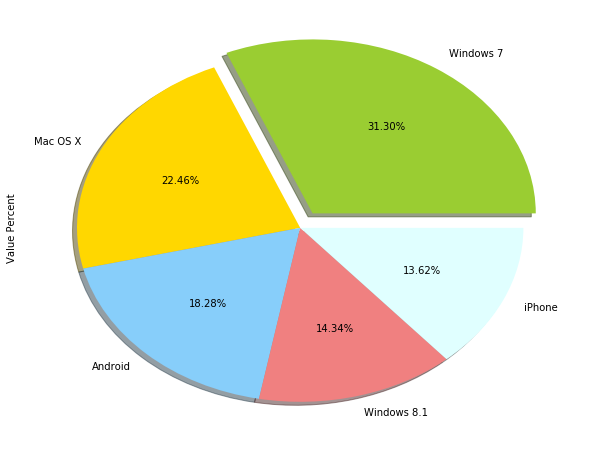

In [21]:
explode = (0.1, 0, 0, 0, 0)
colors_mine = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral',
              'lightcyan']
os_new[:5].plot(kind='pie', y='Value Percent', autopct='%.2f%%',
               shadow=True, explode=explode, legend=False,
               colors=colors_mine)